In [4]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd

import scipy
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from data_plotting_func_min_dist import *
# from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [4]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']
#,
'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']'''

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']'''

"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',\n        

## colored points and grey points

In [5]:
%matplotlib inline
min_dist = 20
max_dist = 200

for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in [0]: #range(0, 50):
        for n_stations in [0]: #range(0, 6, 1):
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)

            #plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)
            #plot_data_subplots_grey([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


In [6]:
in_lim = []
for i, x in enumerate(x_tc):
    if x >= 5 and x < 5.1:
        in_lim.append(y_tc[i])

In [7]:
import statistics
10**statistics.median(in_lim)

0.7100928279847077

## lines at m3+ and m>window length

In [9]:
%matplotlib inline
min_dist = 20
max_dist = 200
n_stations = 0
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in range(0, 50, 10):
        options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
        x_tp, y_tp = calc_tp_mag_lim(df, 3., **options)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3., **options)
        x_tc, y_tc = calc_tc_mag_lim(df, 3., **options)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3., **options)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, mag_lim, **options)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = False, show = True, hyp = True)
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)
        print(tp_params[0][0],tp_params[0][9])
        print(tc_params[0][0],tc_params[0][9])


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


KeyboardInterrupt: 

## lines 2 magnitude units long

In [ ]:
%matplotlib inline
min_dist = 0
max_dist = 200
for f in filenames:
    for n_stations in range(0, 6, 1):
        print(f)
        df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        plot_data_subplots_line_m2([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = True, show = True)
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)
        print(tp_params[0][0],tp_params[0][9])
        print(tc_params[0][0],tc_params[0][9])


In [ ]:
%matplotlib inline
min_dist = 0
max_dist = 200
n_stations = 0
for f in filenames:
    for min_dist in range(0, 200, 10):
        print(f)
        df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        plot_data_subplots_line_m2([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = True, show = True)
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)
        print(tp_params[0][0],tp_params[0][9])
        print(tc_params[0][0],tc_params[0][9])


## gradt mag lines 

In [ ]:
%matplotlib inline
min_dist = 0
max_dist = 200

for f in filenames[0:1]:
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for n_stations in range(0, 6, 1):
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson

        if n_stations == 0:
            axs[0][0].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3, zorder = 1000)

        axs[0][0].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = n_stations)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        if n_stations == 0:
            axs[0][1].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3, zorder = 1000)

        axs[0][1].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = n_stations)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson

        if n_stations == 0:
            axs[1][0].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3, zorder = 1000)

        axs[1][0].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = n_stations)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        if n_stations == 0:
            axs[1][1].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3, zorder = 1000)

        axs[1][1].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = n_stations)

    plt.legend()
    plt.show()


In [ ]:
%matplotlib inline
min_dist = 0
max_dist = 200
n_stations = 0
for f in filenames[0:1]:
    print(f)
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in range(0, 70, 10):
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        if min_dist == 0:
            axs[0][0].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3)
        axs[0][0].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = min_dist)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']
        if min_dist == 0:
            axs[0][1].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3)
        axs[0][1].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = min_dist)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        if min_dist == 0:
            axs[1][0].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3)
        axs[1][0].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = min_dist)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, (mag_lim,mag_lim+2),n=n_stations, min_dist = min_dist, max_dist = max_dist)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson
        if min_dist == 0:
            axs[1][1].fill_between(np.arange(3,8,0.1)[0:len(gradt)],np.array(gradt_std)+np.array(gradt),np.array(gradt)-np.array(gradt_std), alpha = 0.3)
        axs[1][1].plot(np.arange(3,8,0.1)[0:len(gradt)], gradt, label = min_dist)
    plt.legend()
    plt.show()



In [47]:
%matplotlib inline
n_stations = 0
min_dist = 30
max_dist = 200
min_dist_list = []
n_stations_list = []
sign_list_tp = []
sign_list_pgd = []
sign_list_tc = []
sign_list_iv2 = []
n_list_tp = []
n_list_pgd = []
n_list_tc = []
n_list_iv2 = []
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    #print(df.head(10))
    for n_stations in range(1,7):
        for min_dist in range(0, 100, 20):
            options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,**options)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,**options)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,**options)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,**options)

            n_stations_list.append(n_stations)
            min_dist_list.append(min_dist)

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tp_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            tp_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tp']
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'tp', False)
            if len(spearman)>0:
                print('tp', spearman[0])

            res = [idx for idx, val in enumerate(tp_params[4]) if val > 0.05]
            if len(res)>0:
                sign_list_tp.append(res[0])
                n_list_tp.append(tp_params[-2][res[0]])
            else:
                sign_list_tp.append(0)
                n_list_tp.append(tp_params[-2][0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_pgd_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            pgd_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,  'pgd']
            if len(spearman)>0:
                print('pgd', spearman[0])

            res = [idx for idx, val in enumerate(pgd_params[4]) if val > 0.05]
            if len(res)>0:
                sign_list_pgd.append(res[0])
                n_list_pgd.append(pgd_params[-2][res[0]])
            else:
                sign_list_pgd.append(0)
                n_list_pgd.append(pgd_params[-2][0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tc_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', False)
            tc_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tc']
            if len(spearman)>0:
                print('tc', spearman[0])

            res = [idx for idx, val in enumerate(tc_params[4]) if val > 0.05]
            if len(res)>0:
                sign_list_tc.append(res[0])
                n_list_tc.append(tc_params[-2][res[0]])
            else:
                sign_list_tc.append(0)
                n_list_tc.append(tc_params[-2][0])

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_iv2_mag_lim(df, mag_lim,**options)
                #print(len(x[y==0]))
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', False)
            iv2_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n,'iv2']
            if len(spearman)>0:
                print('iv2', spearman[0])

            res = [idx for idx, val in enumerate(iv2_params[4]) if val > 0.05]
            if len(res)>0:
                sign_list_iv2.append(res[0])
                n_list_iv2.append(iv2_params[-2][res[0]])
            else:
                sign_list_iv2.append(0)
                n_list_iv2.append(iv2_params[-2][0])

            #plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params)
            #plot_spearman_subplots_all_on_one_no_n_shaded_percent_var(f, tp_params, pgd_params, iv2_params, tc_params, log = False, save = True, **options)
            #print(tp_params[4][0], tc_params[4][0])
            #plot_spearman_subplots_all_on_one(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True)




eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.4799405062338639
pgd 0.6089165968103959
tc 0.5563437231853089
iv2 0.44732639520425554
tp 0.45437271895046377
pgd 0.591319471998318
tc 0.5317765614609813
iv2 0.4409473375684877
tp 0.433355678022483
pgd 0.568657457388001
tc 0.48004608028870693
iv2 0.419616106570247
tp 0.40791354898234583
pgd 0.5774666881508789
tc 0.41998047938195265
iv2 0.45229635018573716
tp 0.3834624880681195
pgd 0.5855264448848957
tc 0.3165081826287607
iv2 0.5069781428944471
tp 0.5819657244264809
pgd 0.609833662744778
tc 0.6394697934216431
iv2 0.44720098005908876
tp 0.5531817451851803
pgd 0.5927475608412048
tc 0.6079507262114284
iv2 0.44159432890113187
tp 0.5285047913764597
pgd 0.572572612230544
tc 0.5483392435956284
iv2 0.4204555524231751
tp 0.4969822783781455
pgd 0.5826986990241153
tc 0.46879154872036966
iv2 0.4557943758233896
tp 0.45392955488278
pgd 0.5911670519777277
tc 0.33570517750337586
iv2 0.5196951878782788
tp 0.6300499797947987
pgd 0.6066635892141742

In [45]:
%matplotlib inline
n_stations = 0
min_dist = 30
max_dist = 200
min_dist_list = []
n_stations_list = []
sign_list_tp = []
sign_list_pgd = []
sign_list_tc = []
sign_list_iv2 = []
n_list_tp = []
n_list_pgd = []
n_list_tc = []
n_list_iv2 = []
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    #print(df.head(10))
    for n_stations in range(1,7):
        for min_dist in range(0, 100, 20):
            options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,**options)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,**options)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,**options)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,**options)

            n_stations_list.append(n_stations)
            min_dist_list.append(min_dist)

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []

            for mag_lim in magnitudes:
                x, y = calc_tp_mag_lim(df, mag_lim,**options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            tp_params = [gradt, gradt_std, np.array(pearson)**2, spearman, spearman_p, n, 'tp']
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'tp', False)
            if len(spearman)>0:
                print('tp', spearman[0])

            res = [idx for idx, val in enumerate(tp_params[4]) if val > 0.05]
            if len(res)>0:
                print(min_dist, res[0])
                sign_list_tp.append(res[0])
                n_list_tp.append(tp_params[-2][res[0]])
            else:
                sign_list_tp.append(0)
                n_list_tp.append(tp_params[-2][0])



eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20
tp 0.4799405062338639
0 22
tp 0.45437271895046377
20 22
tp 0.433355678022483
40 22
tp 0.40791354898234583
60 18
tp 0.3834624880681195
80 18
tp 0.5819657244264809
0 22
tp 0.5531817451851803
20 22
tp 0.5285047913764597
40 20
tp 0.4969822783781455
60 18
tp 0.45392955488278
80 18
tp 0.6300499797947987
0 21
tp 0.6080254951151669
20 20
tp 0.5885524480485894
40 17
tp 0.5660429710005147
60 17
tp 0.5114172046390248
80 17
tp 0.6810834291034706
0 18
tp 0.6601755994231604
20 18
tp 0.6341895984094099
40 18
tp 0.60679664723645
60 17
tp 0.5473075627137958
80 17
tp 0.7071228025532371
0 17
tp 0.6855048845683464
20 17
tp 0.6676090375572391
40 17
tp 0.6334111301095826
60 16
tp 0.5656527689939024
80 16
tp 0.7305420989943451
0 16
tp 0.7076106299581253
20 16
tp 0.7002417785065108
40 16
tp 0.6637659654652177
60 15
tp 0.5962081158279374
80 16


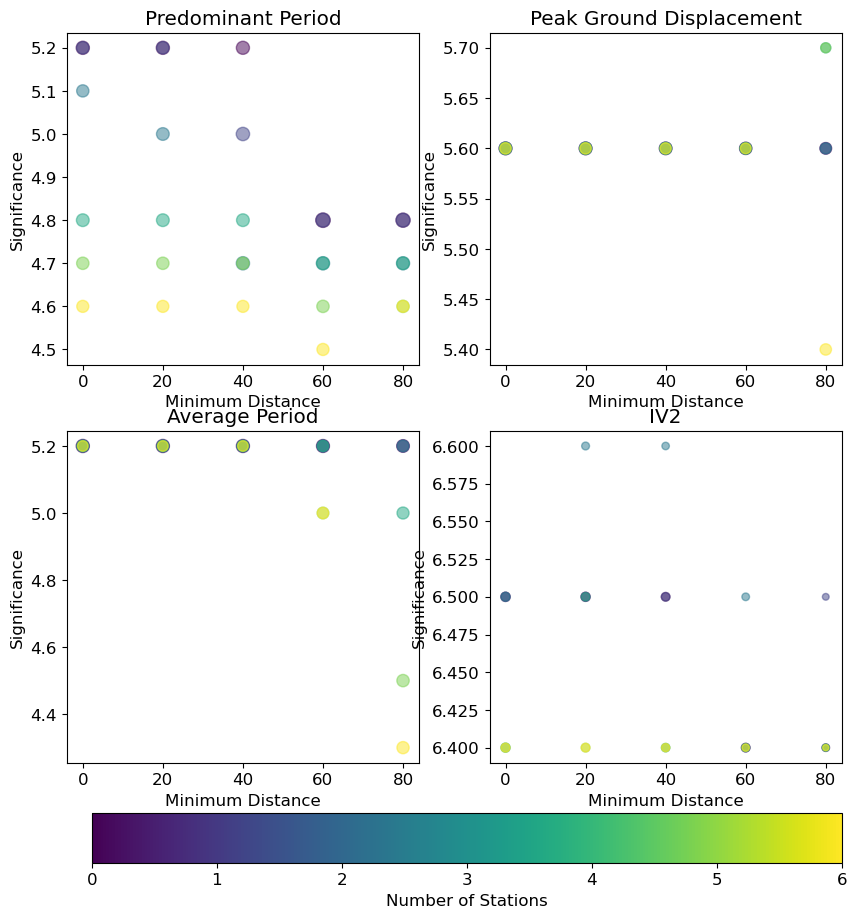

In [49]:
plt.close()
import matplotlib as mpl
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0][0].scatter(min_dist_list, (np.array(sign_list_tp) + 30) / 10, c = n_stations_list, cmap = 'viridis', alpha = 0.5, s = np.log10(n_list_tp)**2 * 10)
axs[1][0].scatter(min_dist_list, (np.array(sign_list_tc) + 30) / 10, c = n_stations_list, cmap = 'viridis', alpha = 0.5, s = np.log10(n_list_tc)**2 * 10)
axs[0][1].scatter(min_dist_list, (np.array(sign_list_pgd) + 30) / 10, c = n_stations_list, cmap = 'viridis', alpha = 0.5, s = np.log10(n_list_pgd)**2 * 10)
axs[1][1].scatter(min_dist_list, (np.array(sign_list_iv2) + 30) / 10, c = n_stations_list, cmap = 'viridis', alpha = 0.5, s = np.log10(n_list_iv2)**2 * 10)

axs[0][0].set_title('Predominant Period')
axs[1][0].set_title('Average Period')
axs[0][1].set_title('Peak Ground Displacement')
axs[1][1].set_title('IV2')

axs[0][0].set_xlabel('Minimum Distance')
axs[1][0].set_xlabel('Minimum Distance')
axs[0][1].set_xlabel('Minimum Distance')
axs[1][1].set_xlabel('Minimum Distance')

axs[0][0].set_ylabel('Significance')
axs[1][0].set_ylabel('Significance')
axs[0][1].set_ylabel('Significance')
axs[1][1].set_ylabel('Significance')

#handles, labels = axs[0][0].get_legend_handles_labels()
#figure = plt.gcf()
#figure.set_size_inches(figure_sizes.a4square)
#fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.03, -0.1, 1, 1), bbox_transform=figure.transFigure)
#figure.tight_layout()


cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=6)
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.15, 0.05, 0.75, 0.05])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label = 'Number of Stations', cax = cbar_ax, orientation = 'horizontal')



In [28]:
max(n_stations_list)

6

## debug

In [ ]:
def sort_tp_data(df, mag_lim=0, n=0, min_dist=0, max_dist=1000):
    list_mag = []
    list_tpmax = []
    count = 0
    # print(mag_lim, type(mag_lim))
    if type(mag_lim) in [int, float, np.float64]:
        min_mag_lim = mag_lim
        max_mag_lim = 10
    else:
        (min_mag_lim, max_mag_lim) = mag_lim
    for index, row in df.iterrows():
        if (row.eq_mag > min_mag_lim and
                row.eq_mag < max_mag_lim and
                len(row.tp_max) >= n):
            list_mag.append(row.eq_mag)
            list_tpmax.append([])
            for d in range(0, len(row.tp_max)):
                if (row.tp_max[d] is not None
                        and row.tp_max[d] > 0
                        and row.distance_dict[row.tp_max_stations[d]] > min_dist
                        and row.distance_dict[row.tp_max_stations[d]] < max_dist):
                    list_tpmax[count].append(row.tp_max[d])
            count += 1
    return list_mag, list_tpmax

def calc_tp_mag_lim(df, mag_lim, n=0, min_dist=0, max_dist=1000):
    # print(mag_lim)
    list_mags, list_tpmax = sort_tp_data(
        df, mag_lim, n=n, min_dist=min_dist, max_dist=max_dist)
    y_aves_tp = []
    x_aves_tp = []
    i = 0
    for i in range(0, len(list_mags)):
        if len(list_tpmax[i]) >= 1:
            mean_tp = np.mean(list_tpmax[i])
            std_tp = np.std(list_tpmax[i])
            y_tp = []
            for j in list_tpmax[i]:
                if (j > mean_tp - 2 * std_tp
                        and j < mean_tp + 2 * std_tp):  # and j < 100:
                    y_tp.append(math.log(j, 10))
                elif len(list_tpmax[i]) == 1:
                    y_tp.append(math.log(j, 10))
            x_tp = np.zeros(len(y_tp))
            x_tp = x_tp + list_mags[i]
            if math.isnan(np.median(y_tp)) is False:
                y_aves_tp.append(np.median(y_tp))
                x_aves_tp.append(list_mags[i])
    return x_aves_tp, y_aves_tp

def calc_opt(x, y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l):
    if len(y) > 0:
        x_use = np.array(x) - 5
        y_use = np.array(y)

        x = x_use
        y = y_use
        # x_unique = np.arange(min(x_use), max(x_use), 0.1)

        if len(set(x)) > 1:
            result = scipy.stats.linregress(x, y)
            a = result.slope
            gradt.append(a)
            b = result.intercept
            intercept.append(b)
            std_a = result.stderr
            gradt_std.append(std_a)
            std_b = result.intercept_stderr
            intercept_std.append(std_b)
            # plt.scatter(x,y)
            # x_plot = np.array([-2,3])
            # plt.plot(x_plot,a*x_plot+b)
            pearson.append(result.rvalue)
            spearman.append(scipy.stats.spearmanr(x, y)[0])
            spearman_p.append(scipy.stats.spearmanr(x, y)[1])
            n_l.append(len(x))
    return gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l

In [ ]:
n_stations = 0
min_dist = 0
max_dist = 200
f = filenames[0]
min_dist = 70
print(f)
df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)

gradt, intercept, gradt_std, intercept_std = [],[],[],[]
pearson = []
spearman = []
spearman_p = []
n_l = []

mag_lim = 3 # for mag_lim in magnitudes:
x, y = calc_tp_mag_lim(df, (mag_lim,mag_lim+1),n=n_stations, min_dist = min_dist, max_dist = max_dist)
gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
tp_pearson = pearson

#plot_data_subplots_line_m2([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = True, show = True)
median, bin_edges, bin_number = scipy.stats.binned_statistic(x, y, statistic='median', bins=np.arange(2.95, 8.05, 0.1), range=None)

plt.scatter(x_tp, y_tp, alpha = 0.1)
plt.scatter(x, y, alpha = 0.5)
plt.plot([3,5], np.log10([3*gradt[0] + intercept[0], 5*gradt[0] + intercept[0]]))
plt.scatter(bin_edges[:-1] + 0.05, median)

#plt.scatter(x_tp, y_tp)
median, bin_edges, bin_number = scipy.stats.binned_statistic(x_tp, y_tp, statistic='median', bins=np.arange(2.95, 8.05, 0.1), range=None)

plt.scatter(bin_edges[:-1] + 0.05, median)

In [ ]:
median

## other stuff

In [ ]:
from spearman_plotting_func import *
plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)

In [ ]:
list_tp_all = list(df.tp_max)

In [ ]:
list_base_folders = ['/home/earthquakes1/homes/Rebecca/phd/data/2005_2018_global_m5/','/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/','/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/']

filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5']

fn = 'eq_object_1s_bandpass_01_19_snr_20_blank_025_new'


for fn in filenames[0:1]:
    print(fn)
    for base_folder in list_base_folders[0:1]:
        print(base_folder)
        folders = os.listdir(base_folder)
        for eq_no in range(0, 1):#len(folders)):
            #start = time.perf_counter()
            #print(base_folder, folders[eq_no], fn)
            if os.path.exists(base_folder+folders[eq_no]+'/'+fn+'.pkl'):
                with open(base_folder+folders[eq_no]+'/'+fn+'.pkl', 'rb') as picklefile:
                    eq = pickle.load(picklefile)

In [ ]:
df

In [ ]:
eq.latitude


In [ ]:
import geopy


def make_distance_dict(eq):
    distances = {}
    inv = eq.inv
    for net in inv:
        for sta in net:
            for loc in sta:
                sta_lat = loc.latitude
                sta_long = loc.longitude
                distance = geopy.distance.distance((eq.event_stats['eq_lat'],eq.event_stats['eq_long']), (sta_lat,sta_long))
                distances[f"{net.code}.{sta.code}.{loc.location_code}"] = distance
    return distances
